<a href="https://colab.research.google.com/github/aleksandra-boop/PRA3024/blob/Week4_NeuralNetwork/Week4_Aleksandra's_ML_cifar_CNN_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - Concolutional Neural Network

---
## *The First Recorded Attempt Attempt In My Life*
#### by Aleksandra Bołbot 

In this task I will be using convolutionalk neural network (CNN) to recgnise images. I have also added some introductory notes that helped me to undersand the premise of CNN, hope this shows better my learning curve!  

A natural process of recognising objects or digits is simple for us to understand to us, because we do it and "feel it" all the time. However it is hard to translate similar thinking to algorithms that can be used by a programme. 

To teach the programme to recognise certain objects we give it a large number of samoles, which we relate to as training samples. Then we develop a system through which the programme will learn how to recognise the objects. 
Increasing the number of samples teaches the program more and more and increases accuracy. 

The way I understand how the neural network tries to recognise the image is as follows. The main part of CNN and a part that makes it a CNN are hidden layers, also called convolutional, that are accompanied by "normal" layers. The program is fed a specific imput (in our case it will probably be the "lit up" pixels that form our image. 

Then, the hidden layers of CNN come in place. The convolutional layer applies a number of filters that recognises specific elements in the image. In written digits recognition it could be looking for answers to questions like "Does this number have a loop up top?", "Does it have a top bar?". On the way it collects information regarding different types of possible shapes and, at the end, produces an output that points to a specific answer to our question. 



**Types of layers**


*Convolutional layer*

*   has a number of filters considering each image as a matrix of values
*   in terms of matrix operation, filter moves along the image matrix, calculating a dot product section by section what produces a convolved feature

*ReLu Layer*

*   first it sets all the negative pixels to 0, this introduces nonlienarity to the network
*   creates rectified feature maps

*Pooling layer*
*   reduces the dimentionality of the rectified feature map
*   uses different filters to recognise features of the objects feed through the network 
*   flattening: a process of converting all two dimensional pooled feature maps into a one dimensional vector (further reducing dimentionality)

*Fully connected layer*
*   flattened matrix from pooling layer is put through Fully connected Layer that classifies the image
*   We get a final vector telling us what is it! 


In [12]:
# Some data-handling functions to download/import.

# from https://github.com/yandexdataschool/mlhep2018/blob/master/day2-Tue/seminar-03-keras-cnn/seminar_tf_keras.ipynb
"""I load some cifar"""

import numpy as np
from sklearn.model_selection import train_test_split
import os, sys
if sys.version_info[0] == 2:
    from urllib import urlretrieve
    import cPickle as pickle

else:
    from urllib.request import urlretrieve
    import pickle

def unpickle(file):
    fo = open(file, 'rb')
    if sys.version_info[0] == 2:
        dict = pickle.load(fo)
    else:
        dict = pickle.load(fo,encoding='latin1')
    
    fo.close()
    return dict


def download_cifar10(path,
                     url='https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
                     tarname='cifar-10-python.tar.gz',):
    import tarfile
    if not os.path.exists(path):
        os.mkdir(path)
    
        

    urlretrieve(url, os.path.join(path,tarname))
    tfile = tarfile.open(os.path.join(path,tarname))
    tfile.extractall(path=path)
    

def load_cifar10(data_path=".",channels_last=False,test_size=0.2,random_state=1337):
    
    test_path = os.path.join(data_path,"cifar-10-batches-py/test_batch")
    train_paths = [os.path.join(data_path,"cifar-10-batches-py/data_batch_%i"%i) for i in range(1,6)]
    
    if not os.path.exists(test_path) or not all(list(map(os.path.exists, train_paths))):
        print ("Dataset not found. Downloading...")
        download_cifar10(data_path)

    train_batches = list(map(unpickle,train_paths))
    test_batch = unpickle(test_path)



    X = np.concatenate([batch["data"] for batch in train_batches]).reshape([-1,3,32,32]).astype('float32')/255
    y = np.concatenate([batch["labels"] for batch in train_batches]).astype('int32')
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=test_size,
                                                   random_state=random_state)
    
    X_test = test_batch["data"].reshape([-1,3,32,32]).astype('float32')/255
    y_test = np.array(test_batch["labels"]).astype('int32')

    
    if channels_last:
        #convert from [batch,3,H,W] to [batch,H,W,3]
        #WARNING! Make this is only necessary for tensorflow-style dim order
        #If you use theano-style dimensions in keras config, skip this cell
        X_train = X_train.transpose([0,2,3,1])
        X_val   = X_val.transpose([0,2,3,1])
        X_test  = X_test.transpose([0,2,3,1])

    
    return X_train,y_train,X_val,y_val,X_test,y_test

In [13]:
# Importing Tensor Flow which is an open-source library used for, among other things, deep learning. 
import tensorflow as tf
#gpu_options = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.1) # restricts GPU load for multi-user nodes
#Importing Keras: "an open source softwar library that provides Python interface for artificial neural networks." 
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
#Pyplot will be used for printing our figures 
import matplotlib.pyplot as plt

#Printing versions of the imports to see, I assume, if they were imported correctly. 
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.3


Yay, printed and working!


In [14]:
# Load the data samples

x_train,y_train,x_val,y_val,x_test,y_test = load_cifar10("cifar_data",channels_last=True)

# Here we state the number of classes (10) and their respective labels. 
# This data set comes from Canadian Institute For Advanced Research and hence the name cifar10
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)
print("Val samples:", x_val.shape, y_val.shape)

Train samples: (40000, 32, 32, 3) (40000,)
Test samples: (10000, 32, 32, 3) (10000,)
Val samples: (10000, 32, 32, 3) (10000,)


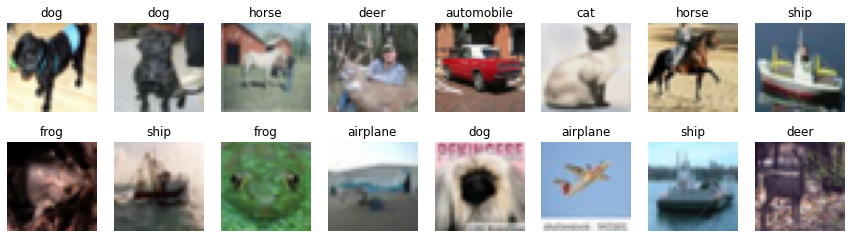

In [15]:
# Here we just print some random images that are going to be fed throught our CNN, along with their respective titles, nothing special! 
# Good to see that cat is still a cat and dog is still a dog, becaue many things can heppen next. :)))) 
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index]])
plt.show()

In [16]:
# normalize inputs
# convert class labels to one-hot encoded, should have shape (?, NUM_CLASSES)
# x_train = x_train.astype(np.float64) - 0.5

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_val = keras.utils.to_categorical(y_val, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [17]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [60]:
def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """

    model = Sequential()

    ### STUDENT CODE HERE ###
    # First I add two dimensionsl convolution layer to learn basic shapes of the image 
    # The input is made out of tensor with shape 
    # After the image is passed through the convolution layer it is abstracted into the feature map
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = x_train.shape[1:]))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
    # Pooling layers reduce the dimentionality of the input 
    model.add(layers.MaxPooling2D((2, 2)))
    # To avoid overfitting, discarding 20% of the lowest accuracy results
    model.add(Dropout(0.2))

    # Second layer! It has the same structure
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))

    #This is where the flattening happens as mentioned in the introductory text
    #The mutidimensional matrix is transformed into a vector that can be fed throught thd fully connected layer
    model.add(Flatten())

    #Compiles the model together in a fully connected layer
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))

    model.add(Dropout(0.2))
    model.summary()

    ### END STUDENT CODE ### 

    # Ensure normalized probabilities over the 10 classes
    model.add(Dense(10, Activation("softmax")))

    return model

In [61]:
### STUDENT CODE HERE ###

# How quickly the model is adapted to the problem. 
INIT_LR = 2e-3  # initial learning rate

# How detailed the learning process is
# The number of training examples in one pass 
BATCH_SIZE = 64

# How often the model learns
EPOCHS = 45


K.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model= make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=keras.optimizers.Adamax(lr=INIT_LR),  # for SGD.
    metrics=['accuracy']  # report accuracy during training
)

# fit model
model.fit(
    x_train, y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val),
    shuffle=True,
)

# save weights to file to avoid re-training
model.save_weights("weights.h5")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [62]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

In this section the predictions will actually happen. After that we will produce and print a confusion matrix that gives information of how often the model mistakes a given object for a different one (for example: how often it thinks that a horse is a deer).

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


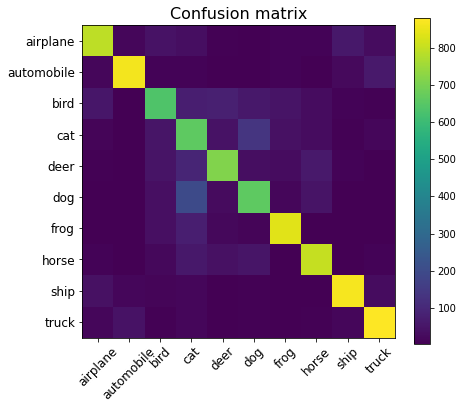

Test accuracy: 0.7723


In [63]:
# make test predictions
#This is where our predictions actually happen
y_pred_test = model.predict_proba(x_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)
y_test_index = [list(onehot).index(1) for onehot in y_test]

# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_index, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()

# Printing the final accuracy here!
print("Test accuracy:", accuracy_score(y_test_index, y_pred_test_classes))

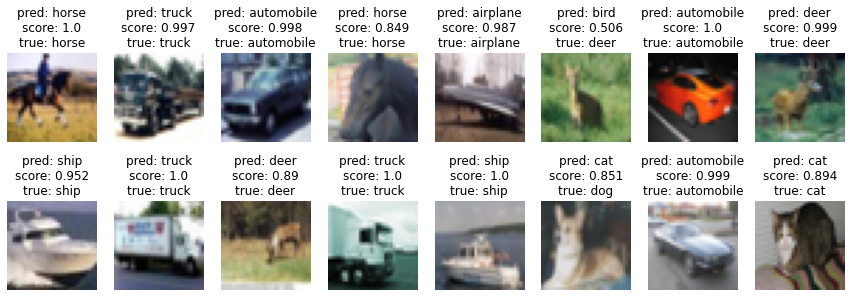

In [64]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test_index[random_index]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()

# Some tips on how to improve:

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.

## Potential grading:
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for building a network that gets above 20% accuracy
* +1 for beating each of these milestones on __TEST__ dataset:
    * 50% (5 total)
    * 60% (6 total)
    * 65% (7 total)
    * 70% (8 total)
    * 75% (9 total)
    * 80% (10 total)

## Bonus points
Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example \"A super-small/fast NN that gets 80%\" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)


## Tips on what can be done:

 * __Network size__
   * More neurons, 
   * More layers, ([lasagne docs](http://lasagne.readthedocs.org))
   * Nonlinearities in the hidden layers
   * tanh, relu, leaky relu, etc
   * Larger networks may take more epochs to train, so don't discard your net just because it could didn't beat the baseline in 5 epochs.

 * __Convolution layers__
   * they __are a must__ unless you have any super-ideas
   * `network = lasagne.layers.Conv2DLayer(prev_layer,`
     `                       num_filters = n_neurons,`
     `                       filter_size = (filter width, filter height),`
     `                       nonlinearity = some_nonlinearity)`
   * Warning! Training convolutional networks can take long without GPU. That's okay.
     * If you are CPU-only, we still recomment to try a simple convolutional architecture
     * a perfect option is if you can set it up to run at nighttime and check it up at the morning.
     * Make reasonable layer size estimates. A 128-neuron first convolution is likely an overkill.
     * __To reduce computation__ time by a factor in exchange for some accuracy drop, try using __stride__ parameter. A stride=2 convolution should take roughly 1/4 of the default (stride=1) one.

   * Plenty other layers and architectures
     * http://lasagne.readthedocs.org/en/latest/modules/layers.html
     * batch normalization, pooling, etc


 * __Early Stopping__
   * Training for 100 epochs regardless of anything is probably a bad idea.
   * Some networks converge over 5 epochs, others - over 500.
   * Way to go: stop when validation score is 10 iterations past maximum


 * __Faster optimization__ - 
   * rmsprop, nesterov_momentum, adam, adagrad and so on.
     * Converge faster and sometimes reach better optima
     * It might make sense to tweak learning rate/momentum, other learning parameters, batch size and number of epochs
   * __BatchNormalization__ (lasagne.layers.batch_norm) FTW!


 * __Regularize__ to prevent overfitting
   * Add some L2 weight norm to the loss function, theano will do the rest
     * Can be done manually or via - http://lasagne.readthedocs.org/en/latest/modules/regularization.html
   * Dropout - to prevent overfitting
     * `lasagne.layers.DropoutLayer(prev_layer, p=probability_to_zero_out)`   
     * Don't overdo it. Check if it actually makes your network better


 * __Data augmentation__ - getting 5x as large dataset for free is a great deal
   * Zoom-in+slice = move
   * Rotate+zoom(to remove black stripes)
   * any other perturbations
   * Add Noize (easiest: GaussianNoizeLayer)
   * Simple way to do that (if you have PIL/Image): 
     * ```from scipy.misc import imrotate,imresize```
     * and a few slicing
   * Stay realistic. There's usually no point in flipping dogs upside down as that is not the way you usually see them.




# Notes on the most efficient setup obtained

In my model I have obted for a two layered structure. It seemed to create a reasonable accuracy without creating many issues. More layers, seemed to be producting errors, which I have not managed to overcome at the time of submitting this assignment. 

### Initial learning rate values

I have opted for slightly lowered learning rate as it seemed to incease accuracy. 


### Batch size values

As it could have een expected increasing the batch size increased the accuracy. However, the difference was not visible after reaching a certain number, so I have decided to stick to the value of 64 for limiting the impact on memory. 

### Epochs

Number of epochs was increased as well. 


*References*


*   Neural Networks and Deep Learning by Michael Nielsen (fantastic!!!)
*   StockOverflow (obviously)
*   Wikipedia
*   tensorflow.org
*   missinglink.ai
*   https://www.youtube.com/watch?v=Jy9-aGMB_TE
*   https://www.youtube.com/watch?v=YRhxdVk_sIs
*   https://datascience-enthusiast.com/DL/Deep-Neural-Network-for-Image-Classification.html

